In [ ]:
import numpy as np
import time
from numpy.random import choice
from random import random
import pickle
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from routines_aux import style

# 1D ancilla

ancilla "are assumed to always be initialized in the computational zero state |0⟩"
memory is recorded by acting with CNOT: circuit qubit control, ancilla qubit is target (always in +Z stabiliser state)


### PBC. cut in the middle

In [ ]:
import matplotlib as mpl
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)

In [ ]:
Ls = [8,12,16,20,24,28,32]
ps = [0.0,0.05,0.1,0.12,0.14,0.16,0.18,0.2,0.25,0.3]

ents_anc_pre = np.zeros((len(Ls), len(ps)), dtype='float64')
ents_anc_post = np.zeros((len(Ls), len(ps)), dtype='float64')
for i in range(len(Ls)):
    for j in range(len(ps)):
        infile = open('ent_anc_pbc/L' + str(Ls[i]) + '_p' + str(ps[j]), 'rb')
        ent = pickle.load(infile)
        infile.close()
        #print(Ls[i], ps[j], ent.shape)
        ents_anc_pre[i,j] = np.mean(ent[0,:])
        ents_anc_post[i,j] = np.mean(ent[1,:])
        
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(Ls, ents_anc_pre, '.-')
plt.xlabel('L', fontsize=12)
plt.ylabel('S(L/2)', fontsize=12)
plt.title('pre-measurement', fontsize=12)
plt.legend(ps)
plt.subplot(1,2,2)
plt.plot(Ls, ents_anc_post, '.-')
plt.xlabel('L', fontsize=12)
plt.ylabel('S(L/2)', fontsize=12)
plt.title('post-measuremeent', fontsize=12)
plt.legend(ps)

# plt.savefig('fig_anc_pbc.pdf')

### tmi

In [ ]:
directory = 'tmi_anc'
tmis_L32 = np.empty((0,10000,8))
for p in ps:
    infile = open(directory + '/L32_p' + str(p), 'rb')
    data = pickle.load(infile)
    tmis_L32 = np.vstack((tmis_L32,data))
    infile.close()

In [ ]:
# old routines may be slightly wrong

# a note about the odd-even effect - this is seen in L16, because depending on how the 4 regions are
# cut, some go through no final gates and some go through gates
# however, for L20, 20/4 is odd so each cut goes through gates on one side and not the other

directory = 'tmi_anc'
ps=[0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185]

infile = open(directory + '/tmi_L16', 'rb')
tmis_L16 = pickle.load(infile)
print(tmis_L16.shape)
infile.close()

infile = open(directory + '/tmi_L20', 'rb')
tmis_L20 = pickle.load(infile)
infile.close()

infile = open(directory + '/tmi_L24', 'rb')
tmis_L24 = pickle.load(infile)
infile.close()

infile = open(directory + '/tmi_L32', 'rb')
tmis_L32 = pickle.load(infile)
infile.close()

plt.figure(figsize=(8,5))
plt.plot(ps,np.mean(np.mean(tmis_L16,axis=1),axis=1), '.-')
plt.plot(ps,np.mean(np.mean(tmis_L20,axis=1),axis=1), '.-')
plt.plot(ps,np.mean(np.mean(tmis_L24,axis=1),axis=1), '.-')
plt.plot(ps,np.mean(np.mean(tmis_L32,axis=1),axis=1), '.-')
plt.legend(['L16', 'L20', 'L24', 'L32'])
plt.grid()
plt.show()

### OBC. only cut down middle per circuit. reps=1500

In [ ]:
Ls = [6,8,10,12,14,16,18]
ps = [0.1,0.12,0.14,0.16,0.18,0.2,0.22]

ents_anc_pre = np.zeros((len(Ls), len(ps)), dtype='float64')
ents_anc_post = np.zeros((len(Ls), len(ps)), dtype='float64')
for i in range(len(Ls)):
    for j in range(len(ps)):
        infile = open('ent_anc_obc_nearpc/L' + str(Ls[i]) + '_p' + str(ps[j]), 'rb')
        ent = pickle.load(infile)
        infile.close()
        #print(Ls[i], ps[j], ent.shape)
        ents_anc_pre[i,j] = np.mean(ent[0,:])
        ents_anc_post[i,j] = np.mean(ent[1,:])

ents_anc_pre_density = ents_anc_pre / np.array(Ls)[:, None]
ents_anc_post_density = ents_anc_post / np.array(Ls)[:, None]


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(Ls, ents_anc_pre, '.-')
plt.xlabel('L')
plt.ylabel('S')
plt.title('pre-measurement: entropy vs. system size')
plt.legend(ps)
plt.subplot(1,2,2)
plt.plot(Ls, ents_anc_post, '.-')
plt.xlabel('L')
plt.ylabel('S')
plt.title('post-measurement: entropy vs. system size')
plt.legend(ps)
plt.show()

### correlation length from I(A:B) vs. separation r between A,B

In [ ]:
directory = 'anccorlen'

L = 24
ps = np.arange(0,0.21,0.02)
rs = np.arange(0, L//2+3, 2)
mis = np.empty((len(ps), len(rs)))

plt.figure(figsize=(15,10))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    plt.subplot(3,4,p_ind+1)
    plt.title('p = ' + str(p))
    mis[p_ind,:] = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    plt.plot(rs, np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0), '.-')
plt.suptitle('L=24, pre-measurement I(A:B) vs. separation of A,B (500 circuit realisations)')
plt.show()

In [ ]:
xis = np.empty(len(ps))

kink_inds = np.argmax(np.diff(mis,2,axis=1), axis=1)+1

for p_ind in range(len(ps)):
    p = ps[p_ind]
    grad = (mis[p_ind,0] - mis[p_ind,kink_inds[p_ind]]) / rs[kink_inds[p_ind]]
    xis[p_ind] = mis[p_ind,0]/2/grad

coeffs = np.polyfit(np.log(ps[3:]), np.log(xis[3:]), deg=1)
print(coeffs)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(ps, xis, '.-')
plt.plot(ps[3:], np.exp(coeffs[1]) * (ps[3:] ** coeffs[0]), '.-')
plt.subplot(1,2,2)
plt.loglog(ps, xis, '.-')
plt.loglog(ps[3:], np.exp(coeffs[1]) * (ps[3:] ** coeffs[0]), '.-')
# plt.loglog(ps, ps[1]*xis[1]/ps, '.-')

In [ ]:
directory = 'anccorlen_t2'

L = 24
ps = np.arange(0,0.21,0.02)
rs = np.arange(0, L//2+3, 2)
mis = np.empty((len(ps), len(rs)))

plt.figure(figsize=(15,10))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    plt.subplot(3,4,p_ind+1)
    plt.title('p = ' + str(p))
    mis[p_ind,:] = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    plt.plot(rs, np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0), '.-')
plt.suptitle('L=24, pre-measurement I(A:B) vs. separation of A,B (500 circuit realisations)')
plt.show()

In [ ]:
xis = np.empty(len(ps))

kink_inds = np.argmax(np.diff(mis,2,axis=1), axis=1)+1

for p_ind in range(len(ps)):
    p = ps[p_ind]
    grad = (mis[p_ind,0] - mis[p_ind,kink_inds[p_ind]]) / rs[kink_inds[p_ind]]
    xis[p_ind] = mis[p_ind,0]/2/grad

coeffs = np.polyfit(np.log(ps[3:]), np.log(xis[3:]), deg=1)
print(coeffs)

fig, ax1 = plt.subplots(figsize=(8,5))

left, bottom, width, height = [0.58, 0.55, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(ps, xis, '.-')
ax1.plot(ps[3:], np.exp(coeffs[1]) * (ps[3:] ** coeffs[0]), '.-')
ax1.text(0.2, 0.2, r'$\xi \propto p^{-\nu}$' + ', ' r'$\nu=$' + str(np.round(-coeffs[0],3)), 
         horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
ax1.set_title(r'L=24')
ax2.loglog(ps, xis, '.-')
ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.legend(['data', 'power law fit'], bbox_to_anchor=(0.7, 0.25))
ax1.set_xlabel('p')
ax1.set_ylabel('correlation length ' + r'$\xi$')

plt.show()

In [ ]:
directory = 'anccorlen'

L = 48
ps = np.arange(0,0.21,0.02)
rs = np.arange(0, L//2+3, 2)
mis = np.empty((len(ps), len(rs)))

plt.figure(figsize=(15,10))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    plt.subplot(3,4,p_ind+1)
    plt.title('p = ' + str(p))
    mis[p_ind,:] = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    plt.plot(rs, np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0), '.-')
    
    #------------------------------------------------------------------------
    # this is the corrected allGates, accounting for the phase evolution of CZ
    # no difference to results, because for entanglement the phase is discarded anyway
#     infile = open(directory + '/L' + str(L) + '_p' + str(p) + '__', 'rb')
#     Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
#     plt.plot(rs, np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0), '.-')
    #------------------------------------------------------------------------
    
    #plt.plot(rs, np.mean(Sa_post+Sb_post-Sab_post, axis=0), '.-')
plt.suptitle('L=48, pre-measurement I(A:B) vs. separation of A,B (500 circuit realisations)')
plt.show()

print(mis[p_ind])

In [ ]:
directory = 'anccorlen_t2'

L = 48
ps = np.arange(0,0.21,0.02)
rs = np.arange(0, L//2+3, 2)
mis = np.empty((len(ps), len(rs)))

plt.figure(figsize=(15,10))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    plt.subplot(3,4,p_ind+1)
    plt.title('p = ' + str(p))
    mis[p_ind,:] = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    plt.plot(rs, np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0), '.-')
plt.suptitle('L=24, pre-measurement I(A:B) vs. separation of A,B (500 circuit realisations)')
plt.show()

In [ ]:
xis = np.empty(len(ps))

kink_inds = np.argmax(np.diff(mis,2,axis=1), axis=1)+1

for p_ind in range(len(ps)):
    p = ps[p_ind]
    grad = (mis[p_ind,0] - mis[p_ind,kink_inds[p_ind]]) / rs[kink_inds[p_ind]]
    xis[p_ind] = mis[p_ind,0]/2/grad

coeffs = np.polyfit(np.log(ps[1:]), np.log(xis[1:]), deg=1)
print(coeffs)

fig, ax1 = plt.subplots(figsize=(8,5))

left, bottom, width, height = [0.5, 0.4, 0.35, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(ps, xis, '.-')
ax1.plot(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.text(0.2, 0.1, r'$\xi \propto p^{-\nu}$' + ', ' r'$\nu=$' + str(np.round(-coeffs[0],3)), 
         horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
ax1.set_title(r'L=48')
ax2.loglog(ps, xis, '.-')
ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.legend(['data', 'power law fit'], bbox_to_anchor=(0.7, 0.25))
ax1.set_xlabel('p')
ax1.set_ylabel('correlation length ' + r'$\xi$')

plt.show()

In [ ]:
directory = 'anccorlen'

L = 72
ps = np.arange(0,0.21,0.02)
rs = np.arange(0, L//2+3, 2)
mis = np.empty((len(ps), len(rs)))

plt.figure(figsize=(15,10))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    plt.subplot(3,4,p_ind+1)
    plt.title('p = ' + str(p))
    mis[p_ind,:] = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    plt.plot(rs, np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0), '.-')
    #plt.plot(rs, np.mean(Sa_post+Sb_post-Sab_post, axis=0), '.-')
plt.suptitle('L=72, pre-measurement I(A:B) vs. separation of A,B (500 circuit realisations)')
plt.show()

In [ ]:
xis = np.empty(len(ps))

kink_inds = np.argmax(np.diff(mis,2,axis=1), axis=1)+1

for p_ind in range(len(ps)):
    p = ps[p_ind]
    grad = (mis[p_ind,0] - mis[p_ind,kink_inds[p_ind]]) / rs[kink_inds[p_ind]]
    xis[p_ind] = mis[p_ind,0]/2/grad

coeffs = np.polyfit(np.log(ps[1:]), np.log(xis[1:]), deg=1)
print(coeffs)

fig, ax1 = plt.subplots(figsize=(8,5))

left, bottom, width, height = [0.5, 0.4, 0.35, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(ps, xis, '.-')
ax1.plot(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.text(0.2, 0.1, r'$\xi \propto p^{-\nu}$' + ', ' r'$\nu=$' + str(np.round(-coeffs[0],3)), 
         horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
ax1.set_title(r'L=72')
ax2.loglog(ps, xis, '.-')
ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.legend(['data', 'power law fit'], bbox_to_anchor=(0.7, 0.25))
ax1.set_xlabel('p')
ax1.set_ylabel('correlation length ' + r'$\xi$')

plt.show()

In [ ]:
directory = 'anccorlen'

L = 96
ps = np.arange(0,0.21,0.02)
xis = np.empty(len(ps))

plt.figure(figsize=(15,10))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    if p<0.1:
        rs = np.arange(0, L//2+3, 2)
    else:
        rs = np.arange(0,20,2)
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    
    plt.subplot(3,4,p_ind+1)
    plt.title('p = ' + str(p))
    
    mis = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    kink_ind = np.argmax(np.diff(mis,2))+1
    
    grad = (mis[0] - mis[kink_ind]) / rs[kink_ind]
    xis[p_ind] = mis[0]/2/grad
    
    plt.plot(rs, np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0), '.-')
plt.suptitle('L=' + str(L) + ', pre-measurement I(A:B) vs. separation of A,B (500 circuit realisations)')
plt.show()


coeffs = np.polyfit(np.log(ps[1:]), np.log(xis[1:]), deg=1)
print(coeffs)

print(ps)
print(xis)

fig, ax1 = plt.subplots(figsize=(8,5))

left, bottom, width, height = [0.5, 0.4, 0.35, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(ps, xis, '.-')
ax1.plot(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.text(0.2, 0.1, r'$\xi \propto p^{-\nu}$' + ', ' r'$\nu=$' + str(np.round(-coeffs[0],3)), 
         horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
ax1.set_title(r'L=' + str(L))
ax2.loglog(ps, xis, '.-')
ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.legend(['data', 'power law fit'], bbox_to_anchor=(0.7, 0.25))
ax1.set_xlabel('p')
ax1.set_ylabel('correlation length ' + r'$\xi$')

plt.show()

In [ ]:
directory = 'anccorlen'

L = 144
ps = np.arange(0,0.19,0.02)
xis = np.empty(len(ps))

plt.figure(figsize=(15,10))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    if p == 0:
        rs = np.arange(0,75,2)
    elif p == 0.02:
        rs = np.arange(0,41,2)
    elif p == 0.04:
        rs = np.arange(0,25,2)
    elif p == 0.06:
        rs = np.arange(0,20,2)
    elif p == 0.08:
        rs = np.arange(0,19,2)
    elif p == 0.1:
        rs = np.arange(0,17,2)
    elif p >= 0.12:
        rs = np.arange(0,15,2)
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    
    plt.subplot(3,4,p_ind+1)
    plt.title('p = ' + str(p))
    
    mis = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    kink_ind = np.argmax(np.diff(mis,2))+1
    
    grad = (mis[0] - mis[kink_ind]) / rs[kink_ind]
    xis[p_ind] = mis[0]/2/grad
    
    plt.plot(rs, np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0), '.-')
plt.suptitle('L=144, pre-measurement I(A:B) vs. separation of A,B (500 circuit realisations)')
plt.show()


coeffs = np.polyfit(np.log(ps[1:]), np.log(xis[1:]), deg=1)
print(coeffs)

fig, ax1 = plt.subplots(figsize=(8,5))

left, bottom, width, height = [0.5, 0.4, 0.35, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(ps, xis, '.-')
ax1.plot(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.text(0.2, 0.1, r'$\xi \propto p^{-\nu}$' + ', ' r'$\nu=$' + str(np.round(-coeffs[0],3)), 
         horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
ax1.set_title('L = ' + str(L))
ax2.loglog(ps, xis, '.-')
ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.legend(['data', 'power law fit'], bbox_to_anchor=(0.7, 0.25))
ax1.set_xlabel('p')
ax1.set_ylabel('correlation length ' + r'$\xi$')

plt.show()

In [ ]:
directory = 'anccorlen'

L = 192
ps = np.arange(0,0.21,0.02)
xis = np.empty(len(ps))

plt.figure(figsize=(15,10))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    if p == 0:
        rs = np.arange(0,99,2)
    elif p == 0.02:
        rs = np.arange(0,41,2)
    elif p == 0.04:
        rs = np.arange(0,25,2)
    elif p == 0.06:
        rs = np.arange(0,20,2)
    elif p == 0.1:
        rs = np.arange(0,17,2)
    elif p == 0.12:
        rs = np.arange(0,99,2)
    elif p == 0.14:
        rs = np.arange(0,99,2)
    elif p == 0.16:
        rs = np.arange(0,15,2)
    elif p == 0.18:
        rs = np.arange(0,15,2)
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    print(Sa_pre.shape)
    plt.subplot(3,4,p_ind+1)
    plt.title('p = ' + str(p))
    
    mis = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    kink_ind = np.argmax(np.diff(mis,2))+1
    
    grad = (mis[0] - mis[kink_ind]) / rs[kink_ind]
    xis[p_ind] = mis[0]/2/grad
    
    plt.plot(rs, np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0), '.-')
plt.suptitle('L=144, pre-measurement I(A:B) vs. separation of A,B (500 circuit realisations)')
plt.show()


coeffs = np.polyfit(np.log(ps[1:]), np.log(xis[1:]), deg=1)
print(coeffs)

fig, ax1 = plt.subplots(figsize=(8,5))

left, bottom, width, height = [0.5, 0.4, 0.35, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(ps, xis, '.-')
ax1.plot(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.text(0.2, 0.1, r'$\xi \propto p^{-\nu}$' + ', ' r'$\nu=$' + str(np.round(-coeffs[0],3)), 
         horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
ax1.set_title('L = ' + str(L))
ax2.loglog(ps, xis, '.-')
ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax1.legend(['data', 'power law fit'], bbox_to_anchor=(0.7, 0.25))
ax1.set_xlabel('p')
ax1.set_ylabel('correlation length ' + r'$\xi$')

print(ps)
print(xis)

plt.show()

In [ ]:
# merging reps of the correlation length experiment

directory = 'temp3'

L = 192
p = 0.2
reps = 20

data_agg = np.zeros((6,0,8))

plt.figure(figsize=(15,10))
for rep in range(1,reps+1):
        
    infile = open(directory + '/L' + str(L) + '_p' + str(p) + '_rep' + str(rep), 'rb')
    data = pickle.load(infile)
    print(data.shape)
    infile.close()
    data_agg = np.hstack((data_agg, data))
    
outfile = open(directory + '/L' + str(L) + '_p' + str(p), 'wb')
pickle.dump(data_agg, outfile)
outfile.close()

In [ ]:
directory = 'anccorlen'

fig, ax1 = plt.subplots(figsize=(8,5))

left, bottom, width, height = [0.5, 0.4, 0.37, 0.42]
ax2 = fig.add_axes([left, bottom, width, height])
# ax1.text(0.2, 0.1, r'$\xi \propto p^{-\nu}$' + ', ' r'$\nu=$' + str(np.round(-coeffs[0],3)), 
#          horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
# ax1.legend(['data', 'power law fit'], bbox_to_anchor=(0.7, 0.25))
ax1.set_xlabel('p')
ax1.set_ylabel('correlation length ' + r'$\xi$')


ps = np.arange(2,21,2)/100

L = 48
rs = np.arange(0, L//2+3, 2)
xis = np.empty(len(ps))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
        
    mis = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    kink_ind = np.argmax(np.diff(mis,2))+1
    grad = (mis[0] - mis[kink_ind]) / rs[kink_ind]
    xis[p_ind] = mis[0]/2/grad

coeffs = np.polyfit(np.log(ps[0:]), np.log(xis[0:]), deg=1)
print(coeffs)
ax1.plot(ps, xis, '.-', alpha=0.5)
# ax1.plot(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax2.loglog(ps, xis, '.-', alpha=0.5)
# ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')


plt.figure(figsize=(15,13))

L = 72
rs = np.arange(0, L//2+3, 2)
xis = np.empty(len(ps))

plt.subplot(2,2,1)
plt.title('L = ' + str(L))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    infile.close()
    mis = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    kink_ind = np.argmax(np.diff(mis,2))+1
    grad = (mis[0] - mis[kink_ind]) / rs[kink_ind]
    xis[p_ind] = mis[0]/2/grad
    if p == 0.2:
        continue
    plt.plot(rs, np.concatenate((np.mean(Sa_pre+Sb_pre-Sab_pre,axis=0), 
                                 np.zeros(len(rs)-Sa_pre.shape[1]))), '.-')
plt.legend(ps)
plt.ylabel('I(A:B)')
plt.xlabel('separation')

coeffs = np.polyfit(np.log(ps[0:]), np.log(xis[0:]), deg=1)
print(coeffs)
ax1.plot(ps, xis, '.-', alpha=0.5)
# ax1.plot(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax2.loglog(ps, xis, '.-', alpha=0.5)
# ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')


L = 96
rs = np.arange(0, L//2+3, 2)
xis = np.empty(len(ps))

plt.subplot(2,2,2)
plt.title('L = ' + str(L))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    infile.close()
    mis = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    kink_ind = np.argmax(np.diff(mis,2))+1
    grad = (mis[0] - mis[kink_ind]) / rs[kink_ind]
    xis[p_ind] = mis[0]/2/grad
    if p == 0.2:
        continue
    plt.plot(rs, np.concatenate((np.mean(Sa_pre+Sb_pre-Sab_pre,axis=0), 
                                 np.zeros(len(rs)-Sa_pre.shape[1]))), '.-')
plt.legend(ps)
plt.ylabel('I(A:B)')
plt.xlabel('separation')

coeffs = np.polyfit(np.log(ps[0:]), np.log(xis[0:]), deg=1)
print(coeffs)
ax1.plot(ps, xis, '.-', alpha=0.5)
# ax1.plot(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax2.loglog(ps, xis, '.-', alpha=0.5)
# ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')

L = 144
rs = np.arange(0, L//2+3, 2)
ps = np.arange(2,19,2)/100
xis = np.empty(len(ps))

plt.subplot(2,2,3)
plt.title('L = ' + str(L))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    plt.plot(rs, np.concatenate((np.mean(Sa_pre+Sb_pre-Sab_pre,axis=0), 
                                 np.zeros(len(rs)-Sa_pre.shape[1]))), '.-')
    
    mis = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    kink_ind = np.argmax(np.diff(mis,2))+1
    grad = (mis[0] - mis[kink_ind]) / rs[kink_ind]
    xis[p_ind] = mis[0]/2/grad
    
plt.legend(ps)
plt.ylabel('I(A:B)')
plt.xlabel('separation')

coeffs = np.polyfit(np.log(ps[0:]), np.log(xis[0:]), deg=1)
print(coeffs)
ax1.plot(ps, xis, '.-', alpha=0.5)
# ax1.plot(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')
ax2.loglog(ps, xis, '.-', alpha=0.5)
# ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '.-')

L = 192
rs = np.arange(0, L//2+3, 2)
ps = np.arange(2,21,2)/100
xis = np.empty(len(ps))

plt.subplot(2,2,4)
plt.title('L = ' + str(L))
for p_ind in range(len(ps)):
    p = ps[p_ind]
    infile = open(directory + '/L' + str(L) + '_p' + str(p), 'rb')
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
    infile.close()
    mis = np.mean(Sa_pre+Sb_pre-Sab_pre, axis=0)
    kink_ind = np.argmax(np.diff(mis,2))+1
    grad = (mis[0] - mis[kink_ind]) / rs[kink_ind]
    xis[p_ind] = mis[0]/2/grad
    if p == 0.2:
        continue
    plt.plot(rs, np.concatenate((np.mean(Sa_pre+Sb_pre-Sab_pre,axis=0), 
                                 np.zeros(len(rs)-Sa_pre.shape[1]))), '.-')

plt.legend(ps)
plt.ylabel('I(A:B)')
plt.xlabel('separation')

# plt.savefig('fig_corlen.pdf')


# import matplotlib as mpl
# # go here to get colourmaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Accent.colors)

coeffs = np.polyfit(np.log(ps[1:]), np.log(xis[1:]), deg=1)
print(coeffs)
coeffs = np.polyfit(np.log(ps[0:]), np.log(xis[0:]), deg=1)
print(coeffs)
ax1.plot(ps, xis, '.-', alpha=0.5)
ax1.plot(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '--', color='k')
ax2.loglog(ps, xis, '.-', alpha=0.5)
ax2.loglog(ps[1:], np.exp(coeffs[1]) * (ps[1:] ** coeffs[0]), '--', color='k')

ax2.legend(['48', '72', '96', '144', '192', r'$\xi \propto p^{-\nu}$'])

# fig.savefig('fig_corexp.pdf')

### I(A:B) in L/3 split

In [ ]:
# rep merger

reps = 10
directory = '../the_cluster/ancL3'

L = 24
ps = np.arange(0,21,1)/100
fs = np.arange(0,11,1)/10

for p in ps:
    print(p)
    data_agg = np.empty((3,0,11))

    for i in range(reps):
        infile = open(directory + '/L' + str(L) + '_p' + str(p) + '_rep' + str(i+1), 'rb')
        data = pickle.load(infile)
        infile.close()

        data_agg = np.hstack((data_agg, data))

    print(data_agg.shape)
    outfile = open(directory + '/L' + str(L) + '_p' + str(p), 'wb')
    pickle.dump(data_agg, outfile)
    outfile.close()

In [ ]:
# rep merger

reps = 10
directory = 'temp10_ancL3_96'

L = 96
# ps = np.arange(0,21,1)/100
# ps = np.concatenate((np.arange(0,0.055,0.005), np.arange(6,22,2)/100))
# ps = np.concatenate((np.arange(0,0.0375,0.0025), np.arange(4,22,2)/100))
# ps = np.concatenate((np.arange(0,0.0375,0.0025), np.arange(4,11,2)/100))
# ps = np.arange(0,0.0325,0.0025)
# ps = np.concatenate((np.arange(0,0.0325,0.0025), np.array([0.05, 0.1, 0.2])))
ps = np.arange(4,11,1)/100
ps = [0.15, 0.2]

for p in ps:
    print(p)
    data_agg = np.empty((3,0,2))

    for i in range(reps):
        infile = open(directory + '/L' + str(L) + '_p' + str(p) + '_rep' + str(i+1), 'rb')
        data = pickle.load(infile)
        infile.close()

        data_agg = np.hstack((data_agg, data))

    print(data_agg.shape)
    outfile = open(directory + '/L' + str(L) + '_p' + str(p), 'wb')
    pickle.dump(data_agg, outfile)
    outfile.close()

In [ ]:
directory = 'ancL3'

import matplotlib as mpl
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b.colors)

Ls = [24, 48, 72, 96]
fs = np.arange(0,11,1)/10
pss = [np.arange(0,21,1)/100,
       np.concatenate((np.arange(0,0.055,0.005), np.arange(6,22,2)/100)),
       np.concatenate((np.arange(0,0.0375,0.0025), np.arange(4,22,2)/100)),
       np.concatenate((np.arange(0,0.0325,0.0025), np.array([0.04,0.06,0.08,0.1,0.15,0.2])))]

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize=(15,12), nrows=2, ncols=2)
axs = [ax1, ax2, ax3, ax4]

for i in range(len(Ls)):
    
    ps = pss[i]
    mis = np.empty((len(ps),len(fs)), dtype='float64')
    
    mi_pre = np.empty(len(ps), dtype='float64')
    mi_post = np.empty(len(ps), dtype='float64')

    axs[i].set_title('L = ' + str(Ls[i]), fontsize=13)
    
    for j in range(len(ps)):
        
        infile = open(directory + '/L' + str(Ls[i]) + '_p' + str(ps[j]), 'rb')
        Sa, Sb, Sab = pickle.load(infile)
        infile.close()
        #print(ps[j], Sa.shape)
        mis[j,:] = np.mean(Sa+Sb-Sab,axis=0)
        #mi_pre_std[j] = np.std(Sa_pre+Sb_pre-Sab_pre)

#     left, bottom, width, height = [0.5, 0.4, 0.37, 0.42]
#     ax2 = axs[i].add_axes([left, bottom, width, height])
#     # ax1.text(0.2, 0.1, r'$\xi \propto p^{-\nu}$' + ', ' r'$\nu=$' + str(np.round(-coeffs[0],3)), 
#     #          horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
#     # ax1.legend(['data', 'power law fit'], bbox_to_anchor=(0.7, 0.25))
#     ax2.set_xlabel('f')
#     ax2.plot(fs, mis[j,:], '.-')
#     #ax1.set_ylabel('correlation length ' + r'$\xi$')
    
    for j in range(len(fs)):
        if j == 0 or j == len(fs)-1: alpha=1; linewidth=3; markersize=10;
        else: alpha=0.7; linewidth=1; markersize=5;
        axs[i].plot(ps, mis[:,j]/Ls[i], '.-', alpha=alpha, linewidth=linewidth, markersize=markersize)
    
    axs[i].set_xlabel('p', fontsize=13)
    axs[i].set_ylabel('I(A:B)', fontsize=13)
    if i == 3: plt.legend(fs)
    
# plt.savefig('fig_anc_L3.pdf')

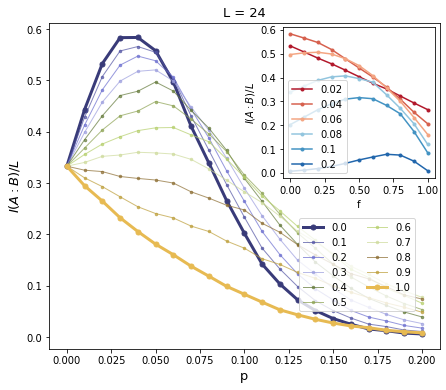

In [73]:
directory = 'ancL3'

import matplotlib as mpl
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Ls = [24, 48, 72, 96]
fs = np.arange(0,11,1)/10
pss = [np.arange(0,21,1)/100,
       np.concatenate((np.arange(0,0.055,0.005), np.arange(6,22,2)/100)),
       np.concatenate((np.arange(0,0.0375,0.0025), np.arange(4,22,2)/100)),
       np.concatenate((np.arange(0,0.0325,0.0025), np.array([0.04,0.06,0.08,0.1,0.15,0.2])))]

fig, ax = plt.subplots(figsize=(7,6))
i = 0
ps = pss[i]
mis = np.empty((len(ps),len(fs)), dtype='float64')
    
mi_pre = np.empty(len(ps), dtype='float64')
mi_post = np.empty(len(ps), dtype='float64')

ax.set_title('L = ' + str(Ls[i]), fontsize=13)
    
plotps = list(np.array([2,4,6,8,10,20])/100)

def lst_gen(lst):
    for item in lst:
        yield item
colours = lst_gen(['#b2182b', '#d6604d', '#f4a582', '#92c5de', '#4393c3', '#2166ac'])

left, bottom, width, height = [0.59, 0.52, 0.3, 0.35]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlabel('f')
ax2.set_ylabel(r'$I(A:B)/L$')

    
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Accent.colors)
for j in range(len(ps)):

    infile = open(directory + '/L' + str(Ls[i]) + '_p' + str(ps[j]), 'rb')
    Sa, Sb, Sab = pickle.load(infile)
    infile.close()
    #print(ps[j], Sa.shape)
    mis[j,:] = np.mean(Sa+Sb-Sab,axis=0)
    #mi_pre_std[j] = np.std(Sa_pre+Sb_pre-Sab_pre)
    if ps[j] in plotps: ax2.plot(fs, mis[j,:]/Ls[i], '.-', color=next(colours))

if i == i: ax2.legend(plotps)

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b.colors)
for j in range(len(fs)):
    if j == 0 or j == len(fs)-1: alpha=1; linewidth=3; markersize=10;
    else: alpha=0.7; linewidth=1; markersize=5;
    ax.plot(ps, mis[:,j]/Ls[i], '.-', alpha=alpha, linewidth=linewidth, markersize=markersize)
    

ax.set_xlabel('p', fontsize=13)
ax.set_ylabel(r'$I(A:B)/L$', fontsize=13)
if i == i: ax.legend(fs, bbox_to_anchor=(0.95,0.1), loc="lower right", ncol=2)
    
# plt.savefig('fig_ancL3_' + str(Ls[i]) + '.pdf')

In [ ]:
import matplotlib as mpl
# go here to get colourmaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Accent.colors)

directory = 'ancL3'

Ls = [24, 48, 72, 96]
fs = np.arange(0,11,1)/10
# pss = [np.arange(0,21,1)/100,
#        np.concatenate((np.arange(0,0.055,0.005), np.arange(6,22,2)/100)),
#        np.concatenate((np.arange(0,0.0375,0.0025), np.arange(4,22,2)/100)),
#        np.concatenate((np.arange(0,0.0325,0.0025), np.array([0.04,0.06,0.08,0.1,0.15,0.2])))]

pss = np.tile(np.array([1,2,3,4,6,8,10])/100, (4,1))

pss = [np.array([1,2,4,6,8,10,14,20])/100,
       np.array([1,2,4,6,8,10,14,20])/100, 
       np.array([1,2,4,6,8,10,14,20])/100,
       np.array([1,2,4,6,8,10,15,20])/100]

plt.figure(figsize=(15,12))

for i in range(len(Ls)):
    
    ps = pss[i]
    mis = np.empty((len(ps),len(fs)), dtype='float64')
    
    mi_pre = np.empty(len(ps), dtype='float64')
    mi_post = np.empty(len(ps), dtype='float64')
    
    
    plt.subplot(2,2,i+1)
    plt.title('L = ' + str(Ls[i]), fontsize=13)
    
    for j in range(len(ps)):
        
        if ps[j] == 0: continue
        
        infile = open(directory + '/L' + str(Ls[i]) + '_p' + str(ps[j]), 'rb')
        Sa, Sb, Sab = pickle.load(infile)
        infile.close()
        #print(ps[j], Sa.shape)
        mis[j,:] = np.mean(Sa+Sb-Sab,axis=0)
        #mi_pre_std[j] = np.std(Sa_pre+Sb_pre-Sab_pre)
        
        plt.plot(fs, mis[j,:], '.-')
    
    print(mis.shape)
    
#     for j in range(len(fs)):
#         if j == 0 or j == len(fs)-1: alpha=1; linewidth=3; markersize=10;
#         else: alpha=0.7; linewidth=1; markersize=5;
#         plt.plot(ps, mis[:,j], '.-', alpha=alpha, linewidth=linewidth, markersize=markersize)
    
    plt.xlabel('f', fontsize=13)
    plt.ylabel('I(A:B)', fontsize=13)
    plt.legend(ps)
    
# plt.savefig('fig_anc_L3.pdf')

In [ ]:
directory = 'clutter/ancL3_prepostonly'
Ls = [24, 48, 72, 96]
pss = [np.arange(0,21,1)/100,
       np.concatenate((np.arange(0,0.055,0.005), np.arange(6,22,2)/100)),
       np.concatenate((np.arange(0,0.0375,0.0025), np.arange(4,22,2)/100)),
       np.concatenate((np.arange(0,0.0325,0.0025), np.array([0.05, 0.1, 0.2])))]

plt.figure(figsize=(15,10))

for i in range(len(Ls)):
    
    ps = pss[i]
    mi_pre = np.empty(len(ps), dtype='float64')
    mi_post = np.empty(len(ps), dtype='float64')
    mi_pre_std = np.empty(len(ps), dtype='float64')
    mi_post_std = np.empty(len(ps), dtype='float64')
    
    for j in range(len(ps)):
        infile = open(directory + '/L' + str(Ls[i]) + '_p' + str(ps[j]), 'rb')
        Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(infile)
        infile.close()
        mi_pre[j] = np.mean(Sa_pre+Sb_pre-Sab_pre)
        #mi_pre_std[j] = np.std(Sa_pre+Sb_pre-Sab_pre)
        mi_post[j] = np.mean(Sa_post+Sb_post-Sab_post)
        #mi_post_std[j] = np.std(Sa_post+Sb_post-Sab_post)
        #print(Sa_pre.shape)

    plt.subplot(2,2,i+1)
    plt.title('L = ' + str(Ls[i]))
    plt.plot(ps, mi_pre, '.-')
    #plt.errorbar(ps, mi_pre, mi_pre_std)
    plt.plot(ps, mi_post, '.-')
    #plt.errorbar(ps, mi_post, mi_post_std)
    plt.legend(['pre-measurement', 'post-measurement'])
    plt.xlabel('p')
    plt.ylabel('I(A:B)')

# plt.suptitle('MI between L/3 regions (200 circuit realisations)')

# plt.savefig('fig_anc_L3.pdf')

### I(A:B) of L/3 split time evolution

In [ ]:
# check light cone

plt.figure(figsize=(16,10))
ps = np.arange(0,0.05,0.05)
for p_ind in range(len(ps)):
    p = ps[p_ind]
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(open('ancL3_evol/L128_p' + str(p), 'rb'))
    plt.subplot(3,3,p_ind+1)
    plt.title('MI vs. t, p=' + str(p))
    plt.plot(np.mean(Sa_pre+Sb_pre-Sab_pre,axis=0),'.-')
    plt.plot(np.mean(Sa_post+Sb_post-Sab_post,axis=0),'.-')
    plt.legend(['pre-meas', 'post-meas'])

In [ ]:
plt.figure(figsize=(16,10))
ps = np.arange(0,0.1,0.05)
for p_ind in range(len(ps)):
    p = ps[p_ind]
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(open('ancL3_evol/L72_p' + str(p), 'rb'))
    plt.subplot(3,3,p_ind+1)
    plt.title('MI vs. t, p=' + str(p))
    plt.plot(np.mean(Sa_pre+Sb_pre-Sab_pre,axis=0),'.-')
    plt.plot(np.mean(Sa_post+Sb_post-Sab_post,axis=0),'.-')
    plt.legend(['pre-meas', 'post-meas'])

In [ ]:
plt.figure(figsize=(16,10))
ps = np.arange(0,25,5)/100
for p_ind in range(len(ps)):
    p = ps[p_ind]
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(open('ancL3_evol/L48_p' + str(p), 'rb'))
    plt.subplot(3,3,p_ind+1)
    plt.title('MI vs. t, p=' + str(p))
    plt.plot(np.mean(Sa_pre+Sb_pre-Sab_pre,axis=0),'.-')
    plt.plot(np.mean(Sa_post+Sb_post-Sab_post,axis=0),'.-')
    plt.legend(['pre-meas', 'post-meas'])

In [ ]:
plt.figure(figsize=(16,10))
ps = np.arange(0,35,5)/100
for p_ind in range(len(ps)):
    p = ps[p_ind]
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(open('ancL3_evol/L24_p' + str(p), 'rb'))
    plt.subplot(3,3,p_ind+1)
    plt.title('MI vs. t, p=' + str(p))
    plt.plot(np.mean(Sa_pre+Sb_pre-Sab_pre,axis=0),'.-')
    plt.plot(np.mean(Sa_post+Sb_post-Sab_post,axis=0),'.-')
    plt.legend(['pre-meas', 'post-meas'])
    

In [ ]:
plt.figure(figsize=(8,5))
ps = np.arange(0,35,5)/100
for p_ind in range(len(ps)):
    p = ps[p_ind]
    Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post = pickle.load(open('ancL3_evol/L24_p' + str(p), 'rb'))
    print(Sa_pre.shape)
    plt.plot(np.mean(Sa_pre+Sb_pre-Sab_pre,axis=0),'.-')
    #plt.plot(np.mean(Sa_post+Sb_post-Sab_post,axis=0),'.-')
plt.legend(ps)
# plt.legend(['0a', '0b', '5a', '5b', '10a', '10b', '15a', '15b'])
plt.xlabel('timestep')
plt.title('pre-measurement bipartite entanglement entropy, L=24')
plt.show()

### I(A:B) of L/8 regions separated by extensive region 

In [ ]:
Ls = [24,48]
ps = np.arange(0,0.21,0.01)

mi_pre = np.empty((len(Ls), len(ps)), dtype='float64')
mi_post = np.empty((len(Ls), len(ps)), dtype='float64')
for i in range(len(Ls)):
    for j in range(len(ps)):
        infile = open('ancL8_obc/L' + str(Ls[i]) + '_p' + str(ps[j]), 'rb')
        [Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post] = pickle.load(infile)
        infile.close()
        mi_pre[i,j] = np.mean(Sa_pre+Sb_pre-Sab_pre)
        mi_post[i,j] = np.mean(Sa_post+Sb_post-Sab_post)

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(ps, mi_pre[0], '.-')
plt.plot(ps, mi_post[0], '.-')
plt.legend(['pre-meas. L=24','post-meas. L=24'])
plt.title('MI of antipodal L/8 regions vs. p (L=24, 5000 circuit realisations)')
plt.subplot(1,2,2)
plt.plot(ps, mi_pre[1], '.-')
plt.plot(ps, mi_post[1], '.-')
plt.legend(['pre-meas. L=48','post-meas. L=48'])
plt.title('MI of antipodal L/8 regions vs. p (L=48, 5000 circuit realisations)')
plt.show()

In [ ]:
Ls = [24,48]
ps = np.arange(0,0.21,0.01)

mi_pre = np.empty((len(Ls), len(ps)), dtype='float64')
mi_post = np.empty((len(Ls), len(ps)), dtype='float64')
for i in range(len(Ls)):
    for j in range(len(ps)):
        infile = open('ancL8_pbc/L' + str(Ls[i]) + '_p' + str(ps[j]), 'rb')
        [Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post] = pickle.load(infile)
        infile.close()
        mi_pre[i,j] = np.mean(Sa_pre+Sb_pre-Sab_pre)
        mi_post[i,j] = np.mean(Sa_post+Sb_post-Sab_post)

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(ps, mi_pre[0], '.-')
plt.plot(ps, mi_post[0], '.-')
plt.legend(['pre-meas. L=24','post-meas. L=24'])
plt.title('MI of antipodal L/8 regions vs. p (L=24, 1000 circuit realisations)')
plt.subplot(1,2,2)
plt.plot(ps, mi_pre[1], '.-')
plt.plot(ps, mi_post[1], '.-')
plt.legend(['pre-meas. L=48','post-meas. L=48'])
plt.title('MI of antipodal L/8 regions vs. p (L=48, 1000 circuit realisations)')
plt.show()

### I(A:B) of regions of varing separation

In [ ]:
# the original sep exp_anc_L3 - very inefficient

import numpy as np
import pickle
from tqdm.auto import tqdm
import sys

from routines_anc import simulate_anc_obc, measure1Danc
from routines_ent import entEntropy

def exp_anc_L3(p, L, reps, directory):
    """
    varying separation
    """
    
    rs = np.arange(0,L//2+3,2)
    
    Sa_pre = np.empty((reps,len(rs)))
    Sb_pre = np.empty((reps,len(rs)))
    Sab_pre = np.empty((reps,len(rs)))
    Sa_post = np.empty((reps,len(rs)))
    Sb_post = np.empty((reps,len(rs)))
    Sab_post = np.empty((reps,len(rs)))
    
    for i in tqdm(range(reps)):

        # evolve
        tab, _, _, _, _, coupled_anc_q = simulate_anc_obc(runtime=2*L, L=L, p=p, verbose=False)

        qubit_pos = [np.sum(np.array(coupled_anc_q) < i) + i for i in range(L)] 
        N = tab.shape[1]//2

        reorder = np.array(list(range(L)) + coupled_anc_q).argsort() # order to group qubit with respective ancillae
        tabReo_pre = np.hstack((tab[:,:N][:,reorder],tab[:,N:2*N][:,reorder]))
        
        tab = measure1Danc(tab, L, verbose=False)
        tabReo_post = np.hstack((tab[:,:N][:,reorder],tab[:,N:2*N][:,reorder]))

        for r_ind in range(len(rs)):
            r = rs[r_ind]
            
            A = range(qubit_pos[(L-r)//2], N)
            B = range(0, qubit_pos[(L+r)//2])
            AB = list(range(0,qubit_pos[(L-r)//2])) + list(range(qubit_pos[(L+r)//2],N))

            Sa_pre[i,r_ind] = entEntropy(tabReo_pre, A)
            Sb_pre[i,r_ind] = entEntropy(tabReo_pre, B)
            Sab_pre[i,r_ind] = entEntropy(tabReo_pre, AB)
            Sa_post[i,r_ind] = entEntropy(tabReo_post, A)
            Sb_post[i,r_ind] = entEntropy(tabReo_post, B)
            Sab_post[i,r_ind] = entEntropy(tabReo_post, AB)
    
    outfile = open(directory + '/L' + str(L) + '_p' + str(p), 'wb')
    pickle.dump(np.stack((Sa_pre, Sb_pre, Sab_pre, Sa_post, Sb_post, Sab_post)), outfile)
    outfile.close()
        
    return rs
    

directory = sys.argv[1]
L = int(sys.argv[2])
reps = int(sys.argv[3])

ps = [float(sys.argv[4])]
#ps = np.arange(0,0.21,0.02)                                                                                                
#ps = np.arange(0,0.11,0.02)                                                                                                 
#ps = np.arange(0.12,0.17,0.02)                                                                                             
#ps = np.arange(0.18,0.21,0.02) 

for p in ps:
    rs = exp_anc_L3(p=p, L=L, reps=reps, directory=directory)

print('runtime 2L')
print('separations', rs)




In [ ]:
from routines_anc import simulate_anc_obc, measure1Danc, xzAncAdjacent
from routines_ent import clippedgauge, getEndpoints, entEntropy

def entEntropyclipped_middle(l_ends, r_ends, site_l, site_r):
    if (site_l < -1) or (site_l >= len(l_ends)) or (site_r < -1) or (site_r >= len(l_ends)):
        raise Exception("invalid site" + ' ' + str(site_l) + ' ' + str(site_r))
    return((np.sum((l_ends <= site_l) * (r_ends > site_l) * (r_ends <= site_r)) +
           np.sum((l_ends <= site_r) * (l_ends > site_l) * (r_ends > site_r)))//2)

def getMIs(l_ends,r_ends,L):
    mis = []
    sep = []

    N = len(l_ends)
    
    for i in range(1,L//2-2):
        
        site_l = qubit_pos[i]
        site_r = qubit_pos[L-i]
        Sa = entEntropyclipped_middle(l_ends, r_ends, -1, site_l-1)
        Sb = entEntropyclipped_middle(l_ends, r_ends, site_r-1, N-1)
        Sab = entEntropyclipped_middle(l_ends, r_ends, site_l-1, site_r-1)
        # AB includes qubit_pos[i+1], excludes qubit_pos[L-i]

        mis.append(Sa+Sb-Sab)
        sep.append(L-2*i)
#         print(site_l, site_r)
#         print(Sa,Sb,Sab)
        
    return(np.array(sep), np.array(mis))

def getMIs_noclip(tab, qubit_pos, L, N):
    sep = []
    mis = []
    for i in range(1,L//2-2):
        A = range(qubit_pos[i],N)
        B = range(0, qubit_pos[L-i])
        AB = list(range(0,qubit_pos[i])) + list(range(qubit_pos[L-i],N))
        Sa = entEntropy(tab,A)
        Sb = entEntropy(tab,B)
        Sab = entEntropy(tab,AB)
        # A excludes qubit_pos[i], B includes qubit_pos[L-i], 
        # AB includes qubit_pos[i] and excludes qubit_pos[L-i]
#         print(qubit_pos[i], qubit_pos[L-i])
#         print(Sa, Sb, Sab)
        mis.append(Sa+Sb-Sab)
        sep.append(L-2*i)
    return np.array(sep), np.array(mis)

In [ ]:
p = 0.07
L = 48
runtime = L

# evolve
tab, _, _, _, _, coupled_anc_q = simulate_anc_obc(runtime=runtime, L=L, p=p, verbose=True)

# for clipped gauge
qubit_pos = [np.sum(np.array(coupled_anc_q) < i) + i for i in range(L)] 
N = tab.shape[1]//2
reorder = np.array(list(range(L)) + coupled_anc_q).argsort() # order to group qubit with respective ancillae

tabRed = xzAncAdjacent(tab, L, coupled_anc_q)
clipped_pre = clippedgauge(tabRed)
tabReo_pre = np.hstack((tab[:,:N][:,reorder],tab[:,N:2*N][:,reorder]))

# measure 
tab = measure1Danc(tab, L, verbose=True)

tabRed = xzAncAdjacent(tab, L, coupled_anc_q)
clipped_post = clippedgauge(tabRed)
tabReo_post = np.hstack((tab[:,:N][:,reorder],tab[:,N:2*N][:,reorder]))

In [ ]:
plt.figure(figsize=(10,5))

l_ends, r_ends = getEndpoints(clipped_pre)
sep,mis = getMIs(l_ends,r_ends,L)
sep1,mis1 = getMIs_noclip(tabReo_pre,qubit_pos,L,N)
print(sep,mis)
print(sep1,mis1)
plt.scatter(sep/L, mis)

l_ends, r_ends = getEndpoints(clipped_post)
sep,mis = getMIs(l_ends,r_ends,L)
sep1,mis1 = getMIs_noclip(tabReo_post,qubit_pos,L,N)
print(sep,mis)
print(sep1,mis1)
plt.scatter(sep/L, mis)

plt.title('p = ' + str(p))
plt.legend(['pre','post'])
plt.show()